# **Exploratory**

```

```



# **PM10**

PM10
ใช้ข้อมูลจากเว็บไซต์ aqi โรงพยาบาลจุฬาลงกรณ์ กทม. 15/6/2017 - 15/1/2019 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
import os


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Bewsure/PM10/main/chulalongkorn_PM10%20(1).csv')
df

,date,PM2.5,PM10
0,6/1/2017,61,38
1,6/2/2017,60,39
2,6/3/2017,40,26
3,6/4/2017,45,28
4,6/5/2017,53,35
...,...,...,...
1008,NaN,NaN,NaN
1009,NaN,NaN,NaN
1010,NaN,NaN,NaN
1011,NaN,NaN,NaN


In [ ]:
df.dtypes

date     object
PM2.5    object
PM10     object
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
df['PM10'] = pd.to_numeric(df['PM10'], errors='coerce')

In [ ]:
df.dtypes

date     datetime64[ns]
PM2.5           float64
PM10            float64
dtype: object

(1013, 3)

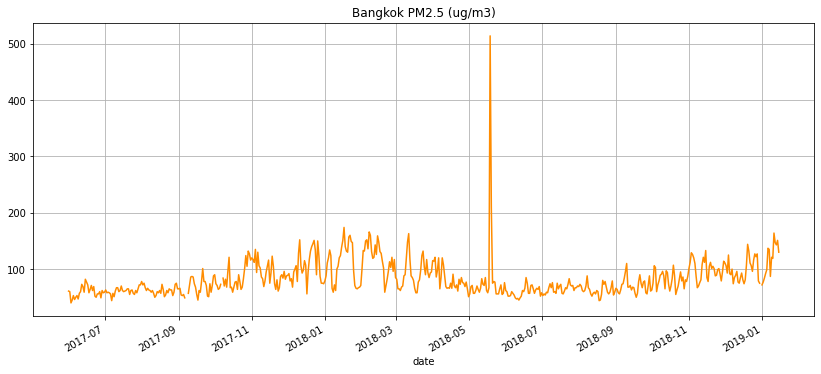

In [ ]:
df.index = df['date']
df['PM2.5'].plot(figsize=(14,6),title="Bangkok PM2.5 (ug/m3)", color='darkorange', grid=True)
df.shape

(1013, 3)

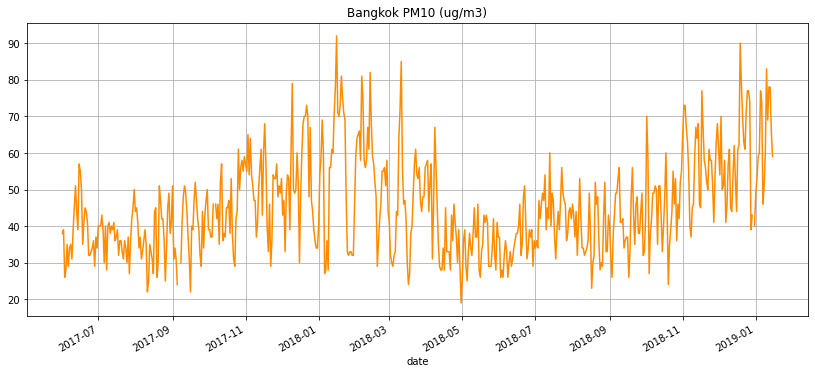

In [ ]:
df.index = df['date']
df['PM10'].plot(figsize=(14,6),title="Bangkok PM10 (ug/m3)", color='darkorange', grid=True)
df.shape

จากกราฟดังกล่าวจะเห็นว่า ข้อมูล PM2.5 มีค่าผิดปกติในช่วงปี 2018 เราจึงเลือกใช้ข้อมูล PM10 ในข้อมูลชุดนี้เท่านั้น

In [ ]:
## Lag data (previous hours)
def add_Lag(df, lags):
    for i in lags:
        df[f'lag_{i}'] = df['PM2.5'].shift(i)
    return df
#df = add_Lag(df, [1]) # [24,48,72,96,120,144,168] , range(1,25)

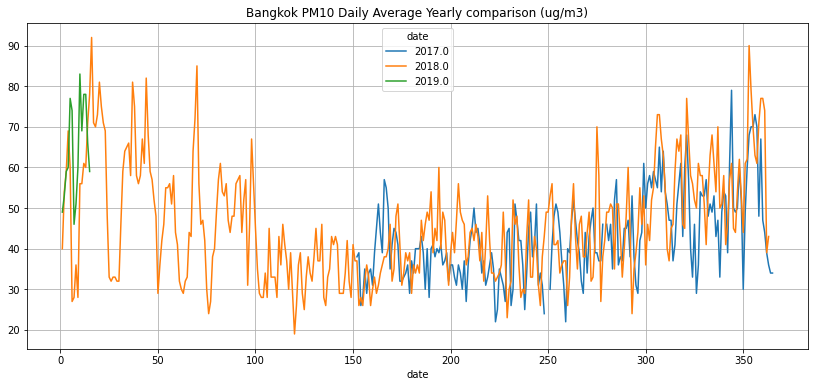

In [ ]:
pv = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,
                    values='PM10', aggfunc='mean')
pv.plot(title="Bangkok PM10 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)



# **PM2.5**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks'

In [ ]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks'

In [ ]:
dh = pd.read_excel('PM2.5_Forcast/PM2.5_Hospital.xlsx',skiprows=0)
dh.columns

Index(['Date', '50T'], dtype='object')

In [ ]:
dh.head()

,Date,50T
0,2017-06-15,28.0
1,2017-06-16,25.0
2,2017-06-17,22.0
3,2017-06-18,16.0
4,2017-06-19,19.0


In [ ]:
dh.rename(columns={'50T':'PM2.5'}, inplace=True)
dh = dh.iloc[:, [0,1]]
dh

,Date,PM2.5
0,2017-06-15,28.0
1,2017-06-16,25.0
2,2017-06-17,22.0
3,2017-06-18,16.0
4,2017-06-19,19.0
5,2017-06-20,23.0
6,2017-06-21,18.0
7,2017-06-22,18.0
8,2017-06-23,13.0
9,2017-06-24,14.0


In [ ]:
dh.index = dh['Date']
dh


,Date,PM2.5
Date,,
2017-06-15,2017-06-15,28.0
2017-06-16,2017-06-16,25.0
2017-06-17,2017-06-17,22.0
2017-06-18,2017-06-18,16.0
2017-06-19,2017-06-19,19.0
2017-06-20,2017-06-20,23.0
2017-06-21,2017-06-21,18.0
2017-06-22,2017-06-22,18.0
2017-06-23,2017-06-23,13.0


(580, 2)

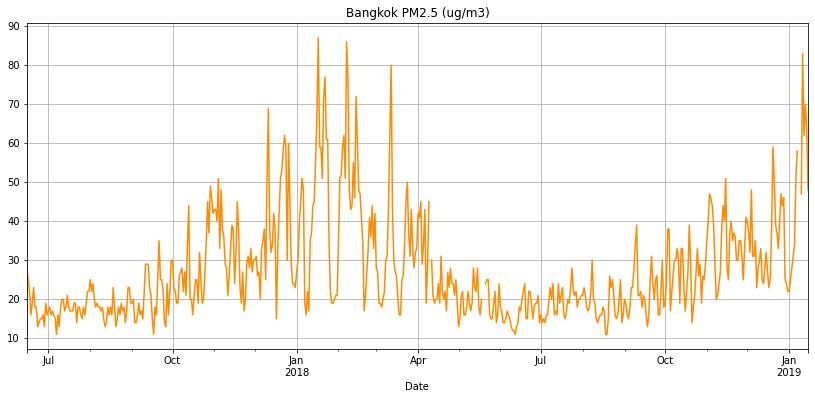

In [ ]:
dh['PM2.5'].plot(figsize=(14,6),title="Bangkok PM2.5 (ug/m3)", color='darkorange', grid=True)
dh.shape

# **ดัชนีการจราจร**

In [ ]:
dff=pd.read_csv('https://raw.githubusercontent.com/Bewsure/PM10/main/trafficindex15062016_15012019.csv')
dff

,timestamp,datetime,index
0,1.497460e+09,2017-06-15T00:00,0.0
1,1.497460e+09,2017-06-15T00:05,0.0
2,1.497460e+09,2017-06-15T00:10,0.0
3,1.497460e+09,2017-06-15T00:15,0.0
4,1.497461e+09,2017-06-15T00:20,0.0
...,...,...,...
215519,NaN,NaN,NaN
215520,NaN,NaN,NaN
215521,NaN,NaN,NaN
215522,NaN,NaN,NaN


In [ ]:
dff.dtypes

timestamp    float64
datetime      object
index        float64
dtype: object

In [ ]:
dff['datetime'] = pd.to_datetime(dff['datetime'])
dff.dtypes

timestamp           float64
datetime     datetime64[ns]
index               float64
dtype: object

In [ ]:
dff.drop(columns=['timestamp'],inplace=True)

In [ ]:
dff = dff.groupby(dff.datetime.dt.date).mean()

In [ ]:
dff

,index
datetime,
2017-06-15,3.345139
2017-06-16,3.820833
2017-06-17,1.996181
2017-06-18,0.986111
2017-06-19,3.220833
2017-06-20,3.592361
2017-06-21,3.807986
2017-06-22,3.471528
2017-06-23,3.974653


(471, 1)

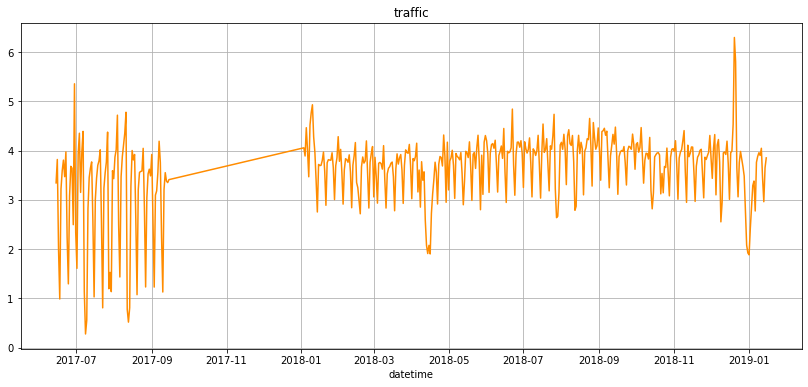

In [ ]:
dff['index'].plot(figsize=(14,6),title="traffic", color='darkorange', grid=True)
dff.shape

In [ ]:
dff = dff.reset_index()


In [ ]:
dff.to_csv('PM2.5_Forcast/Dailytraffic.csv', index=False)

# **สภาพอากาศ**

In [ ]:
dtem =pd.read_csv('https://raw.githubusercontent.com/Bewsure/PM10/main/weature_avg.csv')
dtem

,date,temperature,dewpoint,humidity,wind_speed,pressure
0,2017-06-15,30.897388,22.531343,61.537313,2.900089,100785.970149
1,2017-06-16,31.012727,23.607273,65.854545,3.257431,100690.424242
2,2017-06-17,31.711702,24.369149,65.557895,3.850132,100369.895833
3,2017-06-18,30.508333,23.907292,68.437500,3.392847,100324.166667
4,2017-06-19,30.228079,24.574384,72.857143,2.755870,100494.117647
5,2017-06-20,29.116535,24.862992,79.047244,2.001472,100576.338583
6,2017-06-21,29.375099,24.785375,77.466403,2.530105,100545.494071
7,2017-06-22,28.942292,24.679051,78.628458,2.394403,100568.063241
8,2017-06-23,30.044637,23.675433,69.173010,3.635719,100471.903114
9,2017-06-24,29.301186,23.738340,72.600791,3.320465,100372.806324


# **Merge**

In [ ]:
mdt =pd.read_csv('https://raw.githubusercontent.com/Bewsure/PM10/main/PM2.5_PM10_weather.csv')
mdt



,Date,PM2.5,date_x,temperature,dewpoint,humidity,wind_speed,pressure,date_y,PM10
0,2017-06-15,28.0,2017-06-15,30.897388,22.531343,61.537313,2.900089,100785.970149,2017-06-15,57
1,2017-06-16,25.0,2017-06-16,31.012727,23.607273,65.854545,3.257431,100690.424242,2017-06-16,55
2,2017-06-17,22.0,2017-06-17,31.711702,24.369149,65.557895,3.850132,100369.895833,2017-06-17,50
3,2017-06-18,16.0,2017-06-18,30.508333,23.907292,68.437500,3.392847,100324.166667,2017-06-18,35
4,2017-06-19,19.0,2017-06-19,30.228079,24.574384,72.857143,2.755870,100494.117647,2017-06-19,41
...,...,...,...,...,...,...,...,...,...,...
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mdt.drop(columns=['date_x','date_y'],inplace=True)


In [ ]:
mdt.columns

Index(['Date', 'PM2.5', 'temperature', 'dewpoint', 'humidity', 'wind_speed',
       'pressure', 'PM10'],
      dtype='object')

In [ ]:
mdt

,Date,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10
0,2017-06-15,28.0,30.897388,22.531343,61.537313,2.900089,100785.970149,57
1,2017-06-16,25.0,31.012727,23.607273,65.854545,3.257431,100690.424242,55
2,2017-06-17,22.0,31.711702,24.369149,65.557895,3.850132,100369.895833,50
3,2017-06-18,16.0,30.508333,23.907292,68.437500,3.392847,100324.166667,35
4,2017-06-19,19.0,30.228079,24.574384,72.857143,2.755870,100494.117647,41
...,...,...,...,...,...,...,...,...
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mdt.dtypes

Date            object
PM2.5          float64
temperature    float64
dewpoint       float64
humidity       float64
wind_speed     float64
pressure       float64
PM10            object
dtype: object

In [ ]:
mdt['PM10'] = pd.to_numeric(mdt['PM10'], errors='coerce')

In [ ]:
mdt.dtypes

Date            object
PM2.5          float64
temperature    float64
dewpoint       float64
humidity       float64
wind_speed     float64
pressure       float64
PM10           float64
dtype: object

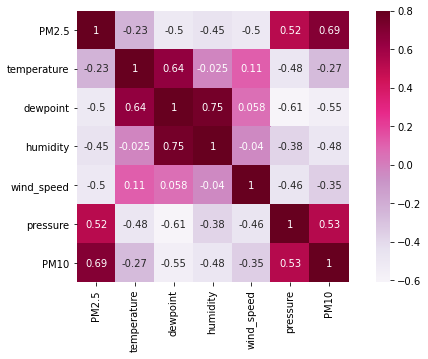

In [ ]:
matrix = mdt.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(matrix,vmax=.8,square=True,cmap="PuRd", annot = True)

In [ ]:
dtls = pd.read_csv('https://raw.githubusercontent.com/Bewsure/PM10/main/Data_LSTM_NC.csv')
dtls

,Date,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10,traffic
0,2017-06-15,28.0,30.897388,22.531343,61.537313,2.900089,100785.970149,57.0,3.345139
1,2017-06-16,25.0,31.012727,23.607273,65.854545,3.257431,100690.424242,55.0,3.820833
2,2017-06-17,22.0,31.711702,24.369149,65.557895,3.850132,100369.895833,50.0,1.996181
3,2017-06-18,16.0,30.508333,23.907292,68.437500,3.392847,100324.166667,35.0,0.986111
4,2017-06-19,19.0,30.228079,24.574384,72.857143,2.755870,100494.117647,41.0,3.220833
...,...,...,...,...,...,...,...,...,...
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dtls.dtypes

Date            object
PM2.5          float64
temperature    float64
dewpoint       float64
humidity       float64
wind_speed     float64
pressure       float64
PM10           float64
traffic        float64
dtype: object

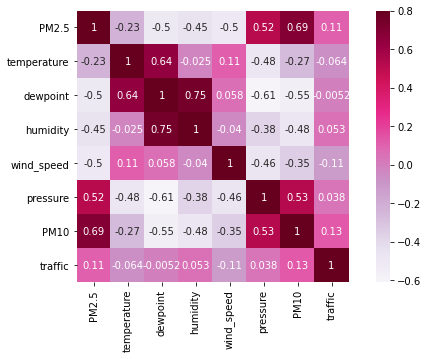

In [ ]:
matrix = dtls.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(matrix,vmax=.8,square=True,cmap="PuRd", annot = True)

In [ ]:
dtls.head()

,Date,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10,traffic
0,2017-06-15,28.0,30.897388,22.531343,61.537313,2.900089,100785.970149,57.0,3.345139
1,2017-06-16,25.0,31.012727,23.607273,65.854545,3.257431,100690.424242,55.0,3.820833
2,2017-06-17,22.0,31.711702,24.369149,65.557895,3.850132,100369.895833,50.0,1.996181
3,2017-06-18,16.0,30.508333,23.907292,68.437500,3.392847,100324.166667,35.0,0.986111
4,2017-06-19,19.0,30.228079,24.574384,72.857143,2.755870,100494.117647,41.0,3.220833


In [ ]:
dtls.index = dtls['Date']

In [ ]:
dtls.head()

,Date,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10,traffic
Date,,,,,,,,,
2017-06-15,2017-06-15,28.0,30.897388,22.531343,61.537313,2.900089,100785.970149,57.0,3.345139
2017-06-16,2017-06-16,25.0,31.012727,23.607273,65.854545,3.257431,100690.424242,55.0,3.820833
2017-06-17,2017-06-17,22.0,31.711702,24.369149,65.557895,3.850132,100369.895833,50.0,1.996181
2017-06-18,2017-06-18,16.0,30.508333,23.907292,68.437500,3.392847,100324.166667,35.0,0.986111
2017-06-19,2017-06-19,19.0,30.228079,24.574384,72.857143,2.755870,100494.117647,41.0,3.220833


In [ ]:
dtls.values

array([['2017-06-15', 28.0, 30.897388059701484, ..., 100785.97014925373,
        57.0, 3.3451388888888864],
       ['2017-06-16', 25.0, 31.01272727272725, ..., 100690.42424242424,
        55.0, 3.820833333333332],
       ['2017-06-17', 22.0, 31.711702127659567, ..., 100369.89583333331,
        50.0, 1.9961805555555567],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [ ]:
dtls = dtls.astype(str)

In [ ]:
dtls.dtypes

Date           object
PM2.5          object
temperature    object
dewpoint       object
humidity       object
wind_speed     object
pressure       object
PM10           object
traffic        object
dtype: object

In [ ]:
dtls = dtls.iloc[0:580, :]

In [ ]:
dtls

,Date,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10,traffic
Date,,,,,,,,,
2017-06-15,2017-06-15,28.0,30.897388059701484,22.53134328358211,61.537313432835816,2.9000885970149293,100785.97014925373,57.0,3.3451388888888864
2017-06-16,2017-06-16,25.0,31.01272727272725,23.607272727272736,65.85454545454546,3.2574314666666693,100690.42424242424,55.0,3.820833333333332
2017-06-17,2017-06-17,22.0,31.711702127659567,24.369148936170216,65.5578947368421,3.850132000000003,100369.89583333331,50.0,1.9961805555555567
2017-06-18,2017-06-18,16.0,30.508333333333308,23.907291666666694,68.4375,3.392847333333333,100324.16666666669,35.0,0.98611111111111
2017-06-19,2017-06-19,19.0,30.228078817733998,24.5743842364532,72.85714285714286,2.7558701176470617,100494.11764705883,41.0,3.2208333333333323
2017-06-20,2017-06-20,23.0,29.11653543307085,24.86299212598423,79.04724409448819,2.001472,100576.33858267717,45.0,3.59236111111111
2017-06-21,2017-06-21,18.0,29.375098814229283,24.78537549407115,77.46640316205534,2.5301050434782657,100545.49407114623,44.0,3.807986111111112
2017-06-22,2017-06-22,18.0,28.94229249011857,24.67905138339921,78.62845849802372,2.3944027826086938,100568.06324110672,41.0,3.471527777777777
2017-06-23,2017-06-23,13.0,30.04463667820068,23.67543252595154,69.17301038062284,3.635719086505184,100471.90311418683,32.0,3.9746527777777794


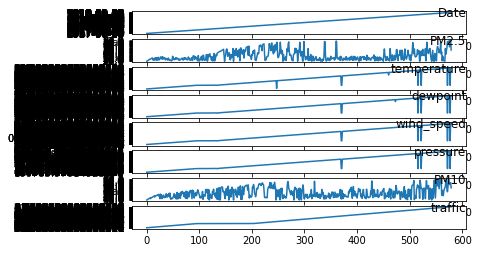

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dtls.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7,8]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dtls.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

# **Tain Model test**

In [ ]:
ncdata = pd.read_csv('https://raw.githubusercontent.com/Bewsure/PM10/main/Data_LSTM_NC.csv')


In [ ]:
ncdata = dtls.iloc[0:580, :]
ncdata

,Date,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10,traffic
Date,,,,,,,,,
2017-06-15,2017-06-15,28.0,30.897388059701484,22.53134328358211,61.537313432835816,2.9000885970149293,100785.97014925373,57.0,3.3451388888888864
2017-06-16,2017-06-16,25.0,31.01272727272725,23.607272727272736,65.85454545454546,3.2574314666666693,100690.42424242424,55.0,3.820833333333332
2017-06-17,2017-06-17,22.0,31.711702127659567,24.369148936170216,65.5578947368421,3.850132000000003,100369.89583333331,50.0,1.9961805555555567
2017-06-18,2017-06-18,16.0,30.508333333333308,23.907291666666694,68.4375,3.392847333333333,100324.16666666669,35.0,0.98611111111111
2017-06-19,2017-06-19,19.0,30.228078817733998,24.5743842364532,72.85714285714286,2.7558701176470617,100494.11764705883,41.0,3.2208333333333323
2017-06-20,2017-06-20,23.0,29.11653543307085,24.86299212598423,79.04724409448819,2.001472,100576.33858267717,45.0,3.59236111111111
2017-06-21,2017-06-21,18.0,29.375098814229283,24.78537549407115,77.46640316205534,2.5301050434782657,100545.49407114623,44.0,3.807986111111112
2017-06-22,2017-06-22,18.0,28.94229249011857,24.67905138339921,78.62845849802372,2.3944027826086938,100568.06324110672,41.0,3.471527777777777
2017-06-23,2017-06-23,13.0,30.04463667820068,23.67543252595154,69.17301038062284,3.635719086505184,100471.90311418683,32.0,3.9746527777777794


In [ ]:
ncdata.columns

Index(['Date', 'PM2.5', 'temperature', 'dewpoint', 'humidity', 'wind_speed',
       'pressure', 'PM10', 'traffic'],
      dtype='object')

In [ ]:
ncdata.dtypes

Date           object
PM2.5          object
temperature    object
dewpoint       object
humidity       object
wind_speed     object
pressure       object
PM10           object
traffic        object
dtype: object

In [ ]:
ncdata['Date'] = pd.to_datetime(ncdata['Date'])

In [ ]:
ncdata.dtypes

Date           datetime64[ns]
PM2.5                  object
temperature            object
dewpoint               object
humidity               object
wind_speed             object
pressure               object
PM10                   object
traffic                object
dtype: object

In [ ]:
Ndt = pd.read_csv('https://raw.githubusercontent.com/Bewsure/DataLSTM/main/New_Data_LSTM_NC%20(1).csv')
Ndt.head()

,Date,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10,traffic
0,15/6/2017,28,30.897388,22.531343,61.537313,2.900089,100785.9701,57,3.345139
1,16/6/2017,25,31.012727,23.607273,65.854545,3.257431,100690.4242,55,3.820833
2,17/6/2017,22,31.711702,24.369149,65.557895,3.850132,100369.8958,50,1.996181
3,18/6/2017,16,30.508333,23.907292,68.437500,3.392847,100324.1667,35,0.986111
4,19/6/2017,19,30.228079,24.574384,72.857143,2.755870,100494.1176,41,3.220833


In [ ]:
Ndt.dtypes

Date            object
PM2.5            int64
temperature    float64
dewpoint       float64
humidity       float64
wind_speed     float64
pressure       float64
PM10             int64
traffic        float64
dtype: object

In [ ]:
Ndt['Date'] = pd.to_datetime(Ndt['Date'])

In [ ]:
Ndt.describe()

,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10,traffic
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,471.000000
mean,27.574138,28.936725,23.641418,74.013097,1.931710,100762.906913,45.343103,3.600648
std,13.263362,1.595064,2.358867,7.698571,0.884954,272.229499,13.122166,0.763144
min,11.000000,19.916236,8.470260,44.501859,0.185332,100024.236100,19.000000,0.275610
25%,18.000000,28.225781,23.518024,70.053765,1.297155,100565.962475,36.000000,3.324815
50%,23.000000,29.191234,24.382027,75.264219,1.821073,100766.692250,43.000000,3.805039
75%,33.000000,29.970748,24.954188,79.251886,2.466081,100931.815875,53.000000,4.025086
max,87.000000,32.583959,26.793307,94.309963,5.396036,101745.241600,92.000000,6.300000


In [ ]:
#Ndt.drop(columns=['traffic'],inplace=True)

In [ ]:
Ndt.index = Ndt['Date']

In [ ]:
Ndt.head()

,Date,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10,traffic
Date,,,,,,,,,
2017-06-15,2017-06-15,28,30.897388,22.531343,61.537313,2.900089,100785.9701,57,3.345139
2017-06-16,2017-06-16,25,31.012727,23.607273,65.854545,3.257431,100690.4242,55,3.820833
2017-06-17,2017-06-17,22,31.711702,24.369149,65.557895,3.850132,100369.8958,50,1.996181
2017-06-18,2017-06-18,16,30.508333,23.907292,68.437500,3.392847,100324.1667,35,0.986111
2017-06-19,2017-06-19,19,30.228079,24.574384,72.857143,2.755870,100494.1176,41,3.220833


In [ ]:
Ndt.drop(columns=['Date'],inplace=True)

In [ ]:
Ndt.head()

,PM2.5,temperature,dewpoint,humidity,wind_speed,pressure,PM10,traffic
Date,,,,,,,,
2017-06-15,28,30.897388,22.531343,61.537313,2.900089,100785.9701,57,3.345139
2017-06-16,25,31.012727,23.607273,65.854545,3.257431,100690.4242,55,3.820833
2017-06-17,22,31.711702,24.369149,65.557895,3.850132,100369.8958,50,1.996181
2017-06-18,16,30.508333,23.907292,68.437500,3.392847,100324.1667,35,0.986111
2017-06-19,19,30.228079,24.574384,72.857143,2.755870,100494.1176,41,3.220833


In [ ]:
from matplotlib import pyplot
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [ ]:
# function สำหรับ preprocess ข้อมูล time series หลายตัวแปร
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True,feat_name=None):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{feat_name[j]}(t-{i})' for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{feat_name[j]}(t)' for j in range(n_vars)]
        else:
            names += [f'{feat_name[j]}(t+{i})' for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# เลือกข้อมูลหุ้นจาก list ของ DataFrame และ drop column 'Close' เนื่องจากเราจะใช้ column 'Adj. Close' เท่านั้น
Ndt = Ndt.drop('traffic',axis = 1)
dataset = Ndt
values = dataset.values
values = values.astype('float32')

# ทำ scaling ข้อมูลด้วยวิธี min max scaling เปลี่ยน scale ข้อมูลแต่ละ column ให้อยู่ระหว่าง [0,1] และเก็บค่า min max แต่ละ column ไว้สำหรับทำ rescale ข้อมูลภายหลัง
min_dict = dict()
max_dict = dict()
for col in dataset.columns:
  min_dict[col] = dataset[col].min()
  max_dict[col] = dataset[col].max()
  dataset[col] = (dataset[col] - dataset[col].min())/(dataset[col].max()-dataset[col].min())

# ใช้ function สำหรับ preprocess ข้อมูลที่เขียนไว้ และ drop column ที่ไม่ได้ใช้
reframed = series_to_supervised(dataset.values, 7, 7,feat_name = Ndt.columns)
reframed.drop(['temperature(t)','temperature(t+1)','temperature(t+2)','temperature(t+3)','temperature(t+4)','temperature(t+5)','temperature(t+6)','dewpoint(t+1)','dewpoint(t+2)','dewpoint(t)','dewpoint(t+3)','dewpoint(t+4)','dewpoint(t+5)','dewpoint(t+6)','humidity(t)','humidity(t+1)','humidity(t+2)','humidity(t+3)','humidity(t+4)','humidity(t+5)','humidity(t+6)','wind_speed(t)','wind_speed(t+1)','wind_speed(t+2)','wind_speed(t+3)','wind_speed(t+4)','wind_speed(t+5)','wind_speed(t+6)','pressure(t)','pressure(t+1)','pressure(t+2)','pressure(t+3)','pressure(t+4)','pressure(t+5)','pressure(t+6)','PM10(t)','PM10(t+1)','PM10(t+2)','PM10(t+3)','PM10(t+4)','PM10(t+5)','PM10(t+6)','PM2.5(t+1)','PM2.5(t+2)','PM2.5(t+3)','PM2.5(t+4)','PM2.5(t+5)','PM2.5(t+6)'],axis=1,inplace=True)





In [ ]:
reframed.head()

,PM2.5(t-7),temperature(t-7),dewpoint(t-7),humidity(t-7),wind_speed(t-7),pressure(t-7),PM10(t-7),PM2.5(t-6),temperature(t-6),dewpoint(t-6),humidity(t-6),wind_speed(t-6),pressure(t-6),PM10(t-6),PM2.5(t-5),temperature(t-5),dewpoint(t-5),humidity(t-5),wind_speed(t-5),pressure(t-5),PM10(t-5),PM2.5(t-4),temperature(t-4),dewpoint(t-4),humidity(t-4),wind_speed(t-4),pressure(t-4),PM10(t-4),PM2.5(t-3),temperature(t-3),dewpoint(t-3),humidity(t-3),wind_speed(t-3),pressure(t-3),PM10(t-3),PM2.5(t-2),temperature(t-2),dewpoint(t-2),humidity(t-2),wind_speed(t-2),pressure(t-2),PM10(t-2),PM2.5(t-1),temperature(t-1),dewpoint(t-1),humidity(t-1),wind_speed(t-1),pressure(t-1),PM10(t-1),PM2.5(t)
7,0.223684,0.866861,0.767399,0.342022,0.520996,0.442610,0.520548,0.184211,0.875966,0.826119,0.428699,0.589575,0.387092,0.493151,0.144737,0.931143,0.867699,0.422743,0.703322,0.200848,0.424658,0.065789,0.836148,0.842493,0.480557,0.615563,0.174276,0.219178,0.105263,0.814025,0.878900,0.569291,0.493319,0.273027,0.301370,0.157895,0.726279,0.894651,0.693570,0.348540,0.320802,0.356164,0.092105,0.746690,0.890415,0.661831,0.449992,0.302880,0.342466,0.092105
8,0.184211,0.875966,0.826119,0.428699,0.589575,0.387092,0.493151,0.144737,0.931143,0.867699,0.422743,0.703322,0.200848,0.424658,0.065789,0.836148,0.842493,0.480557,0.615563,0.174276,0.219178,0.105263,0.814025,0.878900,0.569291,0.493319,0.273027,0.301370,0.157895,0.726279,0.894651,0.693570,0.348540,0.320802,0.356164,0.092105,0.746690,0.890415,0.661831,0.449992,0.302880,0.342466,0.092105,0.712524,0.884612,0.685162,0.423949,0.315994,0.301370,0.026316
9,0.144737,0.931143,0.867699,0.422743,0.703322,0.200848,0.424658,0.065789,0.836148,0.842493,0.480557,0.615563,0.174276,0.219178,0.105263,0.814025,0.878900,0.569291,0.493319,0.273027,0.301370,0.157895,0.726279,0.894651,0.693570,0.348540,0.320802,0.356164,0.092105,0.746690,0.890415,0.661831,0.449992,0.302880,0.342466,0.092105,0.712524,0.884612,0.685162,0.423949,0.315994,0.301370,0.026316,0.799544,0.829839,0.495324,0.662173,0.260119,0.178082,0.039474
10,0.065789,0.836148,0.842493,0.480557,0.615563,0.174276,0.219178,0.105263,0.814025,0.878900,0.569291,0.493319,0.273027,0.301370,0.157895,0.726279,0.894651,0.693570,0.348540,0.320802,0.356164,0.092105,0.746690,0.890415,0.661831,0.449992,0.302880,0.342466,0.092105,0.712524,0.884612,0.685162,0.423949,0.315994,0.301370,0.026316,0.799544,0.829839,0.495324,0.662173,0.260119,0.178082,0.039474,0.740855,0.833272,0.564144,0.601672,0.202539,0.178082,0.052632
11,0.105263,0.814025,0.878900,0.569291,0.493319,0.273027,0.301370,0.157895,0.726279,0.894651,0.693570,0.348540,0.320802,0.356164,0.092105,0.746690,0.890415,0.661831,0.449992,0.302880,0.342466,0.092105,0.712524,0.884612,0.685162,0.423949,0.315994,0.301370,0.026316,0.799544,0.829839,0.495324,0.662173,0.260119,0.178082,0.039474,0.740855,0.833272,0.564144,0.601672,0.202539,0.178082,0.052632,0.808751,0.825938,0.475503,0.615643,0.226998,0.191781,0.052632


In [ ]:
reframed.to_csv('PM2.5_Forcast/data_DC_PM.csv', index=False)

In [ ]:
reframed.dtypes

PM2.5(t-7)          float64
temperature(t-7)    float64
dewpoint(t-7)       float64
humidity(t-7)       float64
wind_speed(t-7)     float64
pressure(t-7)       float64
PM10(t-7)           float64
PM2.5(t-6)          float64
temperature(t-6)    float64
dewpoint(t-6)       float64
humidity(t-6)       float64
wind_speed(t-6)     float64
pressure(t-6)       float64
PM10(t-6)           float64
PM2.5(t-5)          float64
temperature(t-5)    float64
dewpoint(t-5)       float64
humidity(t-5)       float64
wind_speed(t-5)     float64
pressure(t-5)       float64
PM10(t-5)           float64
PM2.5(t-4)          float64
temperature(t-4)    float64
dewpoint(t-4)       float64
humidity(t-4)       float64
wind_speed(t-4)     float64
pressure(t-4)       float64
PM10(t-4)           float64
PM2.5(t-3)          float64
temperature(t-3)    float64
dewpoint(t-3)       float64
humidity(t-3)       float64
wind_speed(t-3)     float64
pressure(t-3)       float64
PM10(t-3)           float64
PM2.5(t-2)          

In [ ]:
reframed.columns

Index(['PM2.5(t-7)', 'temperature(t-7)', 'dewpoint(t-7)', 'humidity(t-7)',
       'wind_speed(t-7)', 'pressure(t-7)', 'PM10(t-7)', 'PM2.5(t-6)',
       'temperature(t-6)', 'dewpoint(t-6)', 'humidity(t-6)', 'wind_speed(t-6)',
       'pressure(t-6)', 'PM10(t-6)', 'PM2.5(t-5)', 'temperature(t-5)',
       'dewpoint(t-5)', 'humidity(t-5)', 'wind_speed(t-5)', 'pressure(t-5)',
       'PM10(t-5)', 'PM2.5(t-4)', 'temperature(t-4)', 'dewpoint(t-4)',
       'humidity(t-4)', 'wind_speed(t-4)', 'pressure(t-4)', 'PM10(t-4)',
       'PM2.5(t-3)', 'temperature(t-3)', 'dewpoint(t-3)', 'humidity(t-3)',
       'wind_speed(t-3)', 'pressure(t-3)', 'PM10(t-3)', 'PM2.5(t-2)',
       'temperature(t-2)', 'dewpoint(t-2)', 'humidity(t-2)', 'wind_speed(t-2)',
       'pressure(t-2)', 'PM10(t-2)', 'PM2.5(t-1)', 'temperature(t-1)',
       'dewpoint(t-1)', 'humidity(t-1)', 'wind_speed(t-1)', 'pressure(t-1)',
       'PM10(t-1)', 'PM2.5(t)'],
      dtype='object')

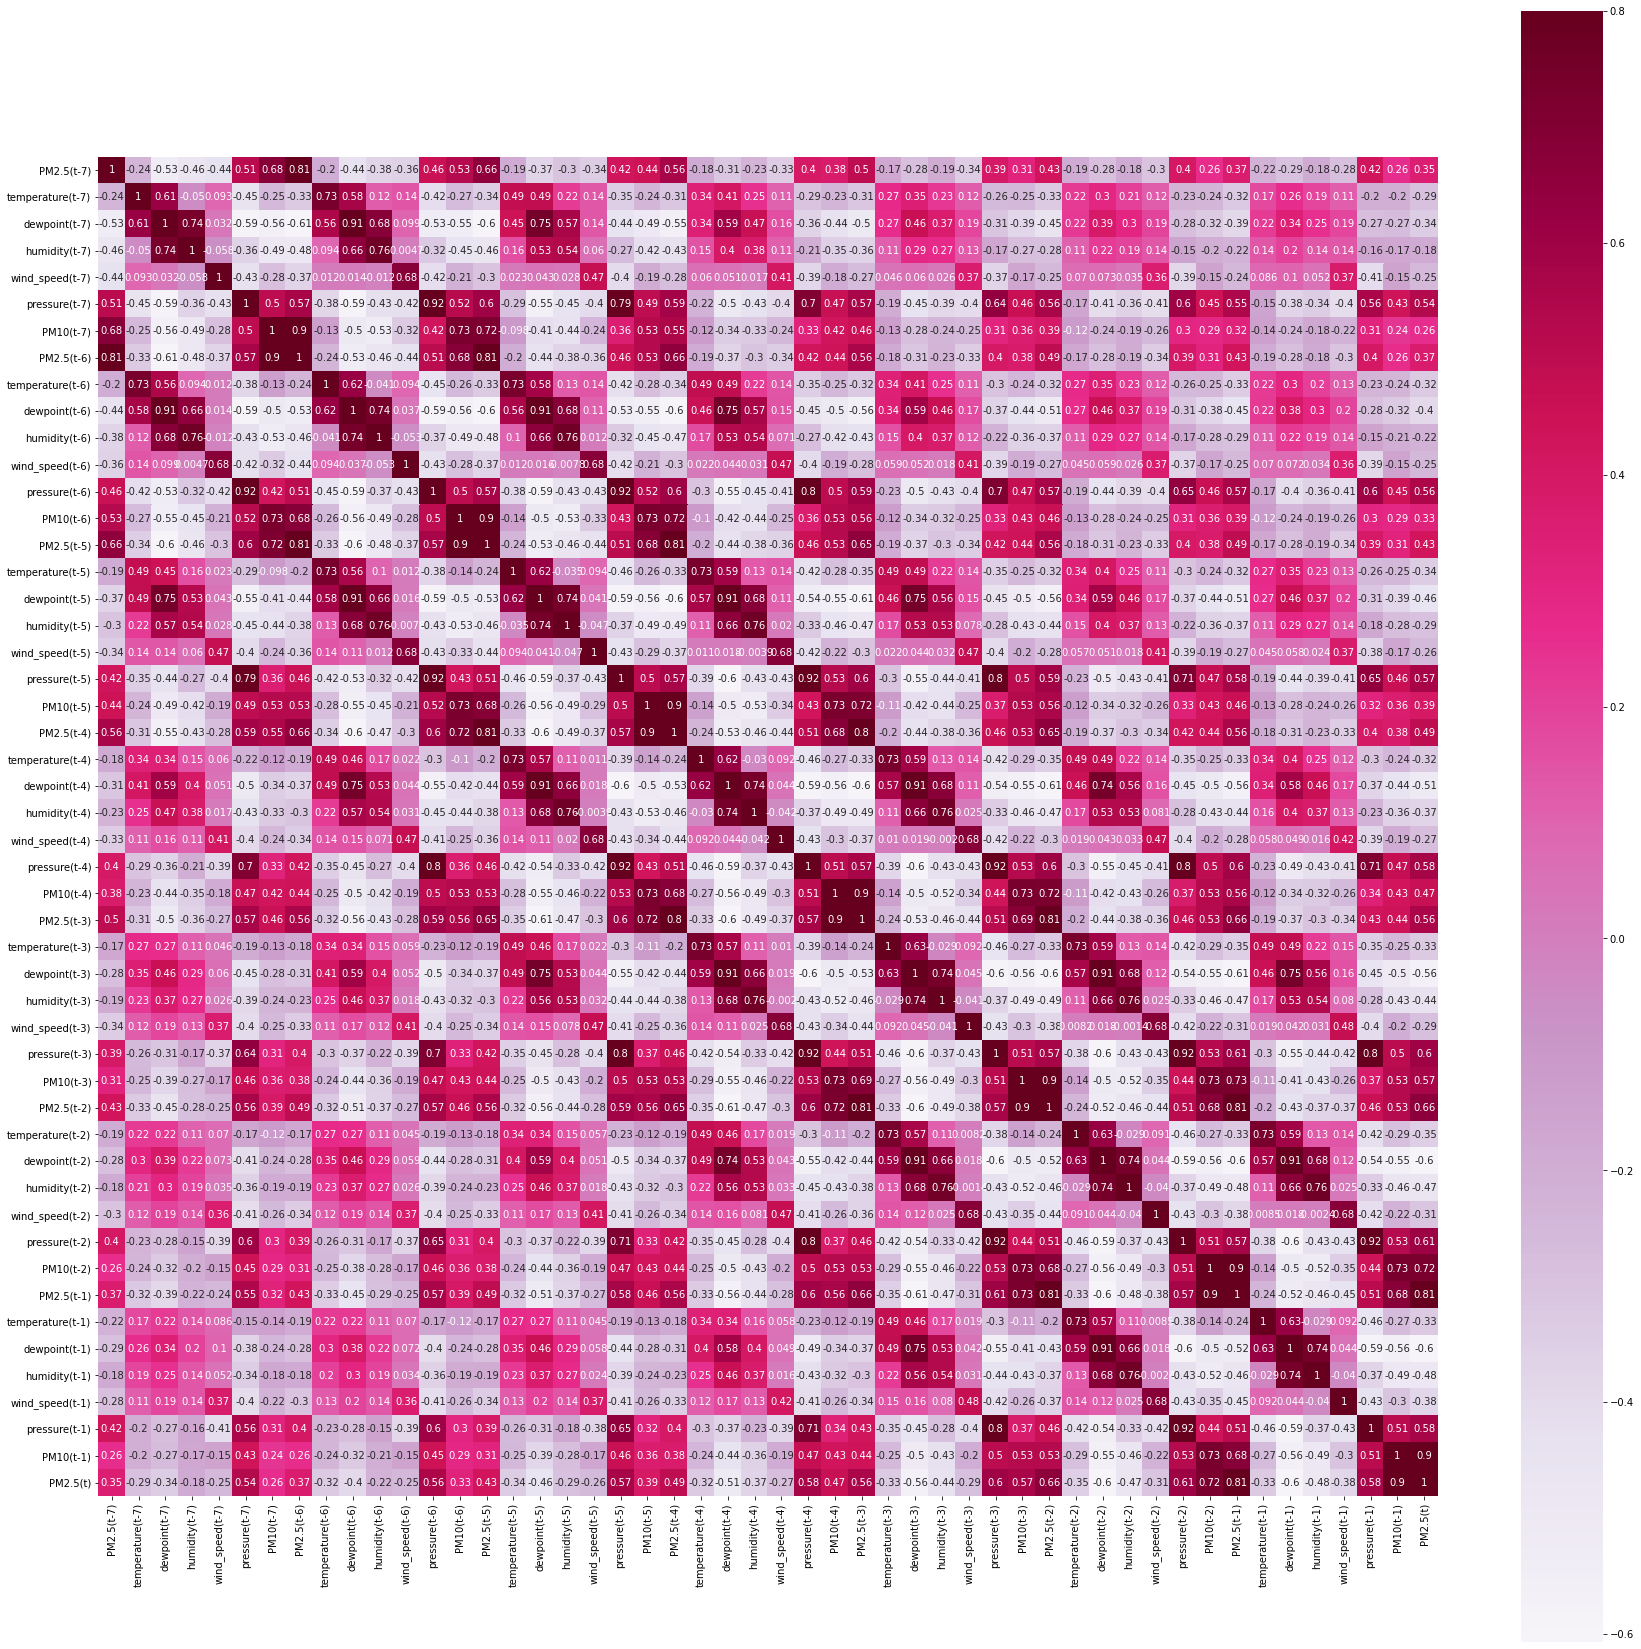

In [ ]:
matrix = reframed.corr()
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(matrix,vmax=.8,square=True,cmap="PuRd", annot = True)